<h1><center>SimpleITK Tutorial</center></h1>

# 2D Images with SimpleITK

Author: José D. Tascón-Vidarte \
Email: jota@di.ku.dk \
University of Copenhagen

Objectives:
- Learn how to create images with SimpleITK
- Reading images and show its properties
- Plotting images with numpy and matplotlib

The documentation of SimpleITK is available at https://itk.org/SimpleITKDoxygen100/html/index.html

This tutorial is based on the Notebooks provided by the Insight Software Consortium. http://insightsoftwareconsortium.github.io/SimpleITK-Notebooks/

##  Cloning files

Open the files to be used from github.

In [1]:
# !git clone https://github.com/josetascon/registration_tutorial.git

## Import Libraries

Import the libraries to be used.

In [2]:
# !pip install simpleitk           # install simpleitk in colabs

import SimpleITK as sitk         # simpleitk library
import numpy as np               # array and matrix library
import matplotlib.pyplot as plt  # plot library

Check the actual version of SimpleITK

In [3]:
print(sitk.Version())

SimpleITK Version: 1.2.0.dev298-gaffed (ITK 4.13)
Compiled: Oct 26 2018 13:47:38



## The Image Class

The most important class in SimpleITK is the Image Class. Several algorithms (functions) use this class as an input parameter.

The constructor of the image class is: <b>sitk.Image(...)</b>

- A monochromatic 2D image is created with three inputs: width, height, PixelIDValueEnum.

- An RGB or any other multichannel image is created with the imputs: [width, height] , PixelIDValueEnum, channels

An example of this is:



In [4]:
image_2d = sitk.Image(400, 300, sitk.sitkFloat32)
image_rgb = sitk.Image([256,128], sitk.sitkVectorUInt16, 3) # multichannel image, RGB

PixelIDValueEnum refers to the pixel type. The options for monochromatic images are presented in left, while the multichannel options in right:

<table>  
    <thead><tr><th>Pixel Type</th><th>Description</th><th>|</th>
        <th>Multichannel Type</th><th>Description</th></tr>
    </thead>
    <tr><td>sitkUInt8</td><td>Unsigned 8 bit integer</td><td>|</td>
        <td>sitkVectorUInt8</td><td>Multi-component of unsigned 8 bit integer</td>
    </tr>
    <tr><td>sitkInt8</td><td>Signed 8 bit integer</td><td>|</td>
        <td>sitkVectorInt8</td><td>Multi-component of signed 8 bit integer</td>    
    </tr>
    <tr><td>sitkUInt16</td><td>Unsigned 16 bit integer</td><td>|</td>
        <td>sitkVectorUInt16</td><td>Multi-component of unsigned 16 bit integer</td>
    </tr>
    <tr><td>sitkInt16</td><td>Signed 16 bit integer</td><td>|</td>
        <td>sitkVectorInt16</td><td>Multi-component of signed 16 bit integer</td>
    </tr>
    <tr><td>sitkUInt32</td><td>Unsigned 32 bit integer</td><td>|</td>
        <td>sitkVectorUInt32</td><td>Multi-component of unsigned 32 bit integer</td>
    </tr>
    <tr><td>sitkInt32</td><td>Signed 32 bit integer</td><td>|</td>
        <td>sitkVectorInt32</td><td>Multi-component of signed 32 bit integer</td>
    </tr>
    <tr><td>sitkUInt64</td><td>Unsigned 64 bit integer</td><td>|</td>
        <td>sitkVectorUInt64</td><td>Multi-component of unsigned 64 bit integer</td>
    </tr>
    <tr><td>sitkInt64</td><td>Signed 64 bit integer</td><td>|</td>
        <td>sitkVectorInt64</td><td>Multi-component of signed 64 bit integer</td>
    </tr>
    <tr><td>sitkFloat32</td><td>32 bit float</td><td>|</td>
        <td>sitkVectorFloat32</td><td>Multi-component of 32 bit float</td>
    </tr>
    <tr><td>sitkFloat64</td><td>64 bit float</td><td>|</td>
        <td>sitkVectorFloat64</td><td>Multi-component of 64 bit float</td>
    </tr>
</table>

## Documentation
SimpleITK classes and functions have the Docstrings derived from the C++ definitions and the Doxygen documentation.

In [5]:
help(sitk.Image)

Help on class Image in module SimpleITK.SimpleITK:

class Image(builtins.object)
 |  Image(*args)
 |  
 |  The main Image class for SimpleITK.
 |  
 |  C++ includes: sitkImage.h
 |  
 |  Methods defined here:
 |  
 |  CopyInformation(self, srcImage)
 |      CopyInformation(Image self, Image srcImage)
 |      
 |      
 |      
 |      Copy common meta-data from an image to this one.
 |      
 |      
 |      Copies the Origin, Spacing, and Direction from the source image to
 |      this image. The meta-data dictionary is not copied.
 |      
 |      It is required for the source Image's dimension and size to match, this image's attributes, otherwise an
 |      exception will be generated.
 |  
 |  EraseMetaData(self, key)
 |      EraseMetaData(Image self, std::string const & key) -> bool
 |      
 |      
 |      
 |      Remove an entry from the meta-data dictionary.
 |      
 |      
 |      Returns true, when the value exists in the dictionary and is removed,
 |      false otherwise

## Image Attributes

An image object has a string casting method. This can be used with the print() python built-in function. With this all the stored information of the image is shown.

In [6]:
print(image_2d)

Image (0x55e4486784c0)
  RTTI typeinfo:   itk::Image<float, 2u>
  Reference Count: 1
  Modified Time: 779
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 0
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [400, 300]
  BufferedRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [400, 300]
  RequestedRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [400, 300]
  Spacing: [1, 1]
  Origin: [0, 0]
  Direction: 
1 0
0 1

  IndexToPointMatrix: 
1 0
0 1

  PointToIndexMatrix: 
1 0
0 1

  Inverse Direction: 
1 0
0 1

  PixelContainer: 
    ImportImageContainer (0x55e4493ed220)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, float>
      Reference Count: 1
      Modified Time: 780
      Debug: Off
      Object Name: 
      Observers: 
        none
      Pointer: 0x55e4494b8

The Image Class has several methods to write or read its attributes.

The following methods are used to get the image size and length.

In [7]:
print(image_2d.GetDimension()) # return integer with dimension
print(image_2d.GetWidth())     # return the width
print(image_2d.GetHeight())    # return the height
print(image_2d.GetSize())      # return tuple with pixel size (width, depth)
print(image_2d.GetSpacing())   # return tuple with length per pixel. Typical units [mm/pixel]

2
400
300
(400, 300)
(1.0, 1.0)


The following methods are used to get the image information related to the channels.

In [8]:
print(image_rgb.GetNumberOfComponentsPerPixel()) # return integer with number of channels
print(image_rgb.GetPixelIDTypeAsString())        # return pixel type as string
print(image_rgb.GetPixelIDValue())               # return integer with pixel coded value (ITK enum)

3
vector of 16-bit unsigned integer
15


The next function is declared to read the main attributes of any image. 

In [9]:
def image_info( image ):
    # Return a string with image information details. Pixel type, dimensions, scale.
    # Input: sitk.Image
    # Output: string
    info = '\n===== Image Information ====='
    info += '\nPixel type: \t\t' + str(image.GetPixelIDTypeAsString())
    info += '\nPixel channels: \t' + str(image.GetNumberOfComponentsPerPixel()) # channels
    info += '\nDimensions: \t\t' + str(image.GetDimension())
    info += '\nSize: \t\t\t' + str(image.GetSize())
    info += '\nLength (mm): \t\t' + str(image.GetSpacing())
    info += '\nTotal Elements: \t' + str(image.GetNumberOfPixels())
    info += '\n'
    return info

This function can be called to summarize the information of an image. Observe the difference between the single channel and the multichannel 2D images.

<b>Note:</b> This function is stored in a local file called [local_utils.py](./local_utils.py) for further usage.

In [10]:
print(image_info(image_2d))
print(image_info(image_rgb))


===== Image Information =====
Pixel type: 		32-bit float
Pixel channels: 	1
Dimensions: 		2
Size: 			(400, 300)
Length (mm): 		(1.0, 1.0)
Total Elements: 	120000


===== Image Information =====
Pixel type: 		vector of 16-bit unsigned integer
Pixel channels: 	3
Dimensions: 		2
Size: 			(256, 128)
Length (mm): 		(1.0, 1.0)
Total Elements: 	32768



## Reading a 2D Image


The method to read images with SimpleITK is: <b>sitk.ReadImage(...)</b>

SimpleITK support different image formats such as: jpg, png, tiff, among others.

An example of reading images is presented above. The images are found in the local folder [images/](./images/)

Credits:
* thorax_ct.jpg:  [www.klinikum.uni-heidelberg.de](https://www.klinikum.uni-heidelberg.de/fileadmin/radiologie/radiodiagnostik/Fallsammlungen/cases/Fall20/inhalt17.html)
* brain.tif:      http://slicer.kitware.com/midas3/item/241320
* simpleitk.png:  https://itk.org/Wiki/SimpleITK

In [25]:
prefix = './images/'
# prefix = "/content/registration_tutorial/images/"

image_jpg = sitk.ReadImage(prefix + 'thorax_ct.jpg')  # www.klinikum.uni-heidelberg.de
image_tif = sitk.ReadImage(prefix + 'brain.tif')      # http://slicer.kitware.com/midas3/item/241320
image_png = sitk.ReadImage(prefix + 'simpleitk.png')  # https://itk.org/Wiki/SimpleITK

Now, it comes usefull the function image_info() to print the attributes of the 2D images.

In [12]:
print(image_info(image_jpg))
print(image_info(image_tif))
print(image_info(image_png))


===== Image Information =====
Pixel type: 		8-bit unsigned integer
Pixel channels: 	1
Dimensions: 		2
Size: 			(381, 259)
Length (mm): 		(0.26458333333333334, 0.26458333333333334)
Total Elements: 	98679


===== Image Information =====
Pixel type: 		16-bit unsigned integer
Pixel channels: 	1
Dimensions: 		2
Size: 			(221, 257)
Length (mm): 		(1.0, 1.0)
Total Elements: 	56797


===== Image Information =====
Pixel type: 		vector of 8-bit unsigned integer
Pixel channels: 	4
Dimensions: 		2
Size: 			(300, 300)
Length (mm): 		(1.0, 1.0)
Total Elements: 	90000



## Accessing Pixels

There are the member functions ``GetPixel`` and ``SetPixel`` which provides an ITK-like interface for pixel access.

In [13]:
print(image_jpg.GetPixel(0, 0))
image_jpg.SetPixel(0, 0, 1)
print(image_jpg.GetPixel(0, 0))

44
1


Pixel values can also be accesed with array index. In this case the sintax is: sitk.Image[x,y]

In [14]:
print(image_jpg[0,0]) # get pixel
image_jpg[0,0] = 44   # set pixel
print(image_jpg[0,0])

1
44


## NumPy Conversion

There is a built-in interface of SimpleITK and NumPy. NumPy is a well-known Python library that support multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. 

Several mathematical and image processing libraries support numpy arrays. Therefore a good way to integrate SimpleITK to other libraries is through numpy.

A numpy array can be obtained with:

In [15]:
image_npa = sitk.GetArrayFromImage(image_jpg)

From here, the numpy array can be used.

The function sitk.GetArrayFromImage( ) creates a full copy of the array representing the image.

The resulting numpy array is inverted (transposed) with regards to the image in SimpleITK. The numpy attributes can be verified with:


In [16]:
print(image_npa.dtype)
print(image_npa.shape)
print(image_npa.size)

uint8
(259, 381)
98679


A numpy array can be converted to an sitk.Image. The opposite method is sitk.GetImageFromArray().

In the following example a numpy array with zeros is created, and next transformed to sitk.Image.

In [17]:
npa = np.zeros((100,200), dtype=np.int8)
image_itk = sitk.GetImageFromArray(npa)

Check the attributes of this new image 

In [18]:
print(image_info(image_itk))


===== Image Information =====
Pixel type: 		8-bit signed integer
Pixel channels: 	1
Dimensions: 		2
Size: 			(200, 100)
Length (mm): 		(1.0, 1.0)
Total Elements: 	20000



## Plot  the image

Transforming sitk.Image to NumPy also enable plotting with Matplotlib. Matplotlib provides an object-oriented API for embedding plots into applications.

The function imshow_2d() is defined to plot a sitk.Image.

In [19]:
def imshow_2d(image_itk, title = '', show = True, axis = False):
    # Function to show a 2D image with matplotlib
    # Inputs: sitk.Image, string with title
    # Output: None
    channels = image_itk.GetNumberOfComponentsPerPixel() # get the number of channels
    image_npa = sitk.GetArrayFromImage(image_itk) # get a copy as numpy array with the image data
    if channels == 1: # set the color map according to the channels
        plt.imshow(image_npa, cmap = plt.cm.gray) # 1 channel for monochrome image
    else:
        plt.imshow(image_npa)   # default color map of pyplot
    plt.title(title)
    if not axis: plt.axis('off') # disable to see axis
    if show: plt.show()         # stop show, useful when subplotting
    return

<b>Note:</b> This function is stored in a local file called [local_utils.py](./local_utils.py) for further usage.

Now, the previous images can be plotted.

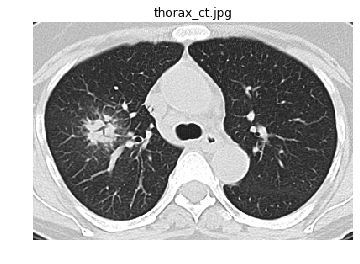

In [20]:
imshow_2d(image_jpg, 'thorax_ct.jpg')

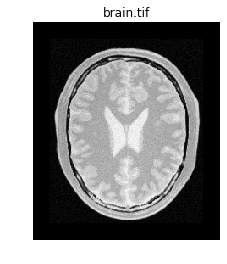

In [21]:
imshow_2d(image_tif, 'brain.tif')

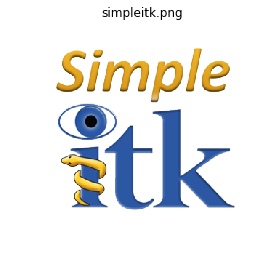

In [22]:
imshow_2d(image_png, 'simpleitk.png')

## Writing a 2D Images

After applying any image processing algorithm to a file is needed to store the resulting file. SimpleITK also support image writing. 

It offers support different image formats such as: jpg, png, tiff, among others.

In the following example. The function sitk.WriteImage is used to convert a tif image to png. The output image can be seen in the local folder [images/](./images/)

In [24]:
prefix = './images/'
# prefix = "/content/registration_tutorial/images/"

image_tif = sitk.ReadImage(prefix + 'brain.tif')
sitk.WriteImage(image_tif, prefix + 'brain.png')

### Note: The functions image_info( ), imshow_2d( ) are stored in the local file utils.py